In [1]:
# PROJECT: House Price Prediction (Linear Regression)
# Goal:
# Predict house prices using multiple features after cleaning and analyzing raw data.
# Model:
# Linear Regression (Multiple Linear Regression)

In [2]:
#import 
import pandas as pd #data handling
import numpy as np #numeric operation
import matplotlib.pyplot as plt #analysis & visualization
import seaborn as sns #analysis & visualization

In [3]:
#import data 
df = pd.read_csv('house_price_raw.csv')

# What we check
# Column names
# Initial data quality
# Any obvious problems

# Industry: This is called data ingestion.

In [4]:
df.head()

,house_id,area,bedrooms,age,distance_city,price
0,H001,1200.0,2.0,10,15,85000
1,H002,1500.0,3.0,5,10,120000
2,H003,800.0,1.0,20,25,50000
3,H004,2000.0,4.0,3,8,180000
4,H005,NaN,3.0,8,12,110000


In [5]:
df.info()
df.shape
# Models cannot handle missing values or wrong types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   house_id       17 non-null     object 
 1   area           16 non-null     float64
 2   bedrooms       16 non-null     float64
 3   age            17 non-null     int64  
 4   distance_city  17 non-null     int64  
 5   price          17 non-null     int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 948.0+ bytes


(17, 6)

In [6]:
df

,house_id,area,bedrooms,age,distance_city,price
0,H001,1200.0,2.0,10,15,85000
1,H002,1500.0,3.0,5,10,120000
2,H003,800.0,1.0,20,25,50000
3,H004,2000.0,4.0,3,8,180000
4,H005,NaN,3.0,8,12,110000
5,H006,1800.0,NaN,4,7,160000
6,H007,950.0,2.0,35,30,45000
7,H008,3000.0,5.0,1,5,250000
8,H002,1500.0,3.0,5,10,120000
9,H009,1200.0,2.0,-5,15,90000


In [7]:
#STEP 3 — Remove Duplicate Records
#Check duplicates
df.duplicated().sum()

2

In [8]:
#Remove Duplicates
df = df.drop_duplicates()

# Duplicate data:
# Biases the model
# Over-represents some houses

In [9]:
df.shape

(15, 6)

In [10]:
#STEP 4 — Handle Missing Values
df.isnull().sum()

house_id         0
area             1
bedrooms         1
age              0
distance_city    0
price            0
dtype: int64

In [11]:
#Use SimpleImputer (Industry Standard) for missing values
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy="median")
# Why MEDIAN?
# Resistant to outliers
# Common industry choice for numeric data
# Rule:
# Mean → clean data
# Median → real-world data


# df[["area","bedrooms"]] = num_imputer.fit_transform(
#     df[["area","bedrooms"]]
# )
df.loc[:,["area","bedrooms"]] = num_imputer.fit_transform(
    df[["area","bedrooms"]]
)

# Why this works
# .loc explicitly says:
# “Modify these columns in the original DataFrame”
# ✔ No ambiguity
# ✔ No warning
# ✔ Industry-safe

In [12]:
df.isnull().sum()

house_id         0
area             0
bedrooms         0
age              0
distance_city    0
price            0
dtype: int64

In [13]:
#STEP 5 — Fix Invalid Values
# df['age'] = df['age'].apply(
#     lambda x: np.nan if x < 0 else x
# )
df.loc [:,'age'] = df['age'].apply(
    lambda x: np.nan if x < 0 else x
)

/var/folders/3_/_hdr074n4b33t_xwpd131__r0000gp/T/ipykernel_44000/2723381933.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[10.  5. 20.  3.  8.  4. 35.  1. nan  2. 80. 15.  7. 25.  6.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc [:,'age'] = df['age'].apply(


In [14]:
df

,house_id,area,bedrooms,age,distance_city,price
0,H001,1200.0,2.0,10.0,15,85000
1,H002,1500.0,3.0,5.0,10,120000
2,H003,800.0,1.0,20.0,25,50000
3,H004,2000.0,4.0,3.0,8,180000
4,H005,1450.0,3.0,8.0,12,110000
5,H006,1800.0,3.0,4.0,7,160000
6,H007,950.0,2.0,35.0,30,45000
7,H008,3000.0,5.0,1.0,5,250000
9,H009,1200.0,2.0,NaN,15,90000
10,H010,5000.0,6.0,2.0,2,600000


In [15]:
# #now fill it with median 
df.loc [:, 'age'] = df["age"].fillna(df['age'].median())
#Industry: This is called business rule validation.

In [16]:
df

,house_id,area,bedrooms,age,distance_city,price
0,H001,1200.0,2.0,10.0,15,85000
1,H002,1500.0,3.0,5.0,10,120000
2,H003,800.0,1.0,20.0,25,50000
3,H004,2000.0,4.0,3.0,8,180000
4,H005,1450.0,3.0,8.0,12,110000
5,H006,1800.0,3.0,4.0,7,160000
6,H007,950.0,2.0,35.0,30,45000
7,H008,3000.0,5.0,1.0,5,250000
9,H009,1200.0,2.0,7.5,15,90000
10,H010,5000.0,6.0,2.0,2,600000


In [17]:
#STEP 6 — Exploratory Data Analysis (EDA)
#Summary Statistics
df.describe()

,area,bedrooms,age,distance_city,price
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1713.333333,2.933333,15.233333,15.666667,146666.666667
std,1092.256293,1.387015,20.273898,10.654755,139740.405583
min,600.000000,1.000000,1.000000,2.000000,30000.000000
25%,1100.000000,2.000000,4.500000,8.500000,70000.000000
50%,1450.000000,3.000000,7.500000,12.000000,110000.000000
75%,1900.000000,3.500000,17.500000,21.500000,170000.000000
max,5000.000000,6.000000,80.000000,40.000000,600000.000000


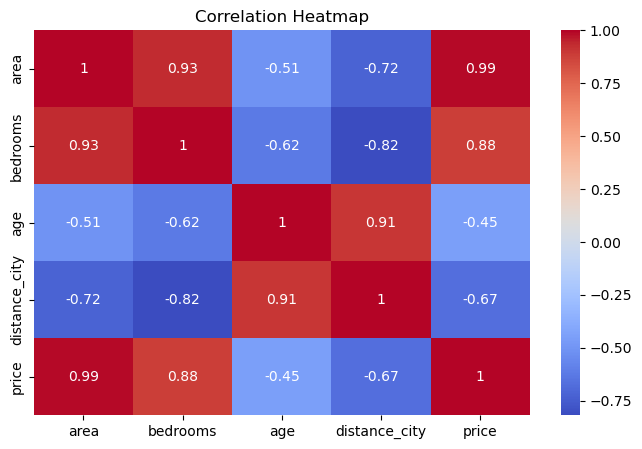

In [18]:

# Correlation Analysis (numeric only)
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Interpretation
# Strong positive correlation → useful feature
# Weak correlation → less impact
# Industry:
# Used for:
# Feature selection
# Business explanation to clients

In [19]:
#STEP 7 — Feature & Target Selection
X = df.drop(['house_id','price'],axis = 1)
y = df['price']

# Why drop house_id?
# It’s an identifier
# No predictive value
# Industry rule: IDs are never features.

In [20]:
df

,house_id,area,bedrooms,age,distance_city,price
0,H001,1200.0,2.0,10.0,15,85000
1,H002,1500.0,3.0,5.0,10,120000
2,H003,800.0,1.0,20.0,25,50000
3,H004,2000.0,4.0,3.0,8,180000
4,H005,1450.0,3.0,8.0,12,110000
5,H006,1800.0,3.0,4.0,7,160000
6,H007,950.0,2.0,35.0,30,45000
7,H008,3000.0,5.0,1.0,5,250000
9,H009,1200.0,2.0,7.5,15,90000
10,H010,5000.0,6.0,2.0,2,600000


In [21]:
X

,area,bedrooms,age,distance_city
0,1200.0,2.0,10.0,15
1,1500.0,3.0,5.0,10
2,800.0,1.0,20.0,25
3,2000.0,4.0,3.0,8
4,1450.0,3.0,8.0,12
5,1800.0,3.0,4.0,7
6,950.0,2.0,35.0,30
7,3000.0,5.0,1.0,5
9,1200.0,2.0,7.5,15
10,5000.0,6.0,2.0,2


In [22]:
y

0      85000
1     120000
2      50000
3     180000
4     110000
5     160000
6      45000
7     250000
9      90000
10    600000
11     30000
13     95000
14    135000
15     55000
16    195000
Name: price, dtype: int64

In [23]:
#STEP 8 — Train Test Split
# Why?
# Simulates real future data
#Prevents overfitting

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
#STEP 9 — Standardization (StandardScaler)
# Why scaling?
# Linear regression uses gradient descent.
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train_Scaled =  scalar.fit_transform(X_train)
X_test_Scaled = scalar.transform(X_test)

# 📌 Important rule
# ❌ Never fit scaler on test data
# ✔ Fit on train, apply on test

In [25]:
#STEP 10 Train Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_Scaled,y_train)

LinearRegression()

In [26]:
#STEP 1.1 Model Prediction
y_pred = model.predict(X_test_Scaled)

In [27]:
#STEP 1.2 Model Evaluation
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R2 Score:", r2)
print("RMSE:", rmse)

# Interpretation
# R² closer to 1 → better model
# Lower RMSE → better prediction accuracy
# Industry benchmarks
# R² > 0.7 → acceptable
# R² > 0.85 → strong

R2 Score: 0.8442578009196146
RMSE: 94892.01657760408


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [28]:
print(len(X_test), len(y_test), len(y_pred))


3 3 3


In [29]:
#STEP 1.3 Model Coefficients (Business Insight)
coeff_df = pd.DataFrame({
    "Features" : X.columns,
    "Coefficient": model.coef_
})
coeff_df

# Meaning
# Positive → price increases
# Negative → price decreases
# Industry:
# Used in reports & stakeholder meetings.

,Features,Coefficient
0,area,56497.020109
1,bedrooms,-5541.231806
2,age,14808.663618
3,distance_city,-28495.507618


In [30]:
#OVERALL FLOW (IMPORTANT)
# Train model
# → Save model + scaler
# → Create Streamlit app
# → Take user input
# → Predict price
# → Show result

In [31]:
#STEP 1 — Save Your Trained Model & Scaler
import pickle

# Save model
pickle.dump(model, open("house_model.pkl", "wb"))

# Save scaler
pickle.dump(scalar, open("scaler.pkl", "wb"))

In [32]:
#STEP 2 — Install Streamlit
%pip install streamlit


Note: you may need to restart the kernel to use updated packages.


In [92]:
# STEP 3 — Create UI File
# Create a new Python file:
